# 8월 14일 시험
## 황 성 윤

## 1. 다음과 같은 array를 Numpy를 이용하여 만드시오.

In [1]:
import numpy as np

In [6]:
# 1)
np.arange(0,5,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [2]:
# 2)
np.array([[1,2,3,4,5],[6,7,8,9,10]], dtype=np.float32)

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.]], dtype=float32)

In [3]:
# 3)
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
# 4)
np.ones((4,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [7]:
# 5)
np.arange(1,25,2).reshape(3,4)

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15],
       [17, 19, 21, 23]])

## 2. 다음과 같은 데이터프레임을 만드시오.

In [11]:
import pandas as pd

data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
}
columns = ["지역", "2015", "2010", "2005", "2000"]
index = ["서울", "부산", "인천", "대구"]
korea_df = pd.DataFrame(data, index=index, columns=columns)
korea_df["2010-2015 증가율"] = ((korea_df["2015"] - korea_df["2010"]) / korea_df["2010"]).round(4)
korea_df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0164
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


## 3. 타이타닉 승객에 대해서 다음을 구하시오.

### 1. 성별(sex) 인원수, 선실별(class) 인원수, 사망/생존(alive) 인원수를 구하시오.

In [14]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datascienceschool/docker_rpython/master/data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic["number"] = 1
titanic.number.groupby(titanic.Sex).sum()

Sex
female    314
male      577
Name: number, dtype: int64

In [20]:
titanic.number.groupby(titanic.Pclass).sum()

Pclass
1    216
2    184
3    491
Name: number, dtype: int64

In [21]:
titanic.number.groupby(titanic.Survived).sum()

Survived
0    549
1    342
Name: number, dtype: int64

### 2. '미성년자', '청년', '중년', '장년', '노년' 승객의 비율을 구하시오.

In [22]:
bins = [1, 15, 25, 35, 60, 99]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
titanic["Age_category"] = pd.cut(titanic["Age"], bins, labels=labels)
titanic.number.groupby(titanic.Age_category).sum() / sum(titanic.number)

Age_category
미성년자    0.077441
청년      0.244669
중년      0.219978
장년      0.218855
노년      0.024691
Name: number, dtype: float64

## 4. 팁 데이터에 대해서 다음을 구하시오.

### 1. 팁의 비율(%)을 소숫점 둘째자리까지 구하시오.

In [23]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
tips['tip_pct'] = (tips['tip'] / tips['total_bill'] * 100).round(2)
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
5,25.29,4.71,Male,No,Sun,Dinner,4,18.62
6,8.77,2.00,Male,No,Sun,Dinner,2,22.81
7,26.88,3.12,Male,No,Sun,Dinner,4,11.61
8,15.04,1.96,Male,No,Sun,Dinner,2,13.03
9,14.78,3.23,Male,No,Sun,Dinner,2,21.85


### 2. 팁의 비율이 가장 높은 날은 목, 금, 토, 일요일 중 어떤 날인지 피벗테이블을 이용하여 구하시오.

In [28]:
import pandas as pd
tips.groupby(["day"])[["tip_pct"]].mean().round(3)
# 금요일이 가장 비율이 높음.

,tip_pct
day,
Thur,16.126
Fri,16.992
Sat,15.315
Sun,16.690


## 5. 다음의 지시대로 SQLite3을 이용하는 파이썬 프로그램을 작성하시오.

In [29]:
import sqlite3
conn = sqlite3.connect('test.db')

In [30]:
cur = conn.cursor()
# Eagles table
cur.execute('CREATE TABLE IF NOT EXISTS Eagles \
    (back_no INT NOT NULL, \
     name TEXT, \
     position TEXT, \
     PRIMARY KEY(back_no));')

In [31]:
cur = conn.cursor()
cur.execute("INSERT INTO Eagles VALUES \
            (8, '정근우', '내야수'), \
            (17, '김범수', '투수'), \
            (36, '장민재', '투수'), \
            (66, '유장혁', '외야수'), \
            (65, '김진욱', '투수') ; ")
conn.commit()

In [33]:
cur = conn.cursor()
cur.execute('SELECT * FROM Eagles')
rows = cur.fetchall()
for row in rows:
    print(row)

(8, '정근우', '내야수')
(17, '김범수', '투수')
(36, '장민재', '투수')
(66, '유장혁', '외야수')
(65, '김진욱', '투수')


In [34]:
cur = conn.cursor()
cur.execute("UPDATE Eagles SET position='외야수' \
             WHERE back_no=8;")
conn.commit()

In [35]:
cur = conn.cursor()
cur.execute('SELECT * FROM Eagles')
row = cur.fetchone()
print(row)

(8, '정근우', '외야수')


In [36]:
cur = conn.cursor()
cur.execute('DELETE FROM Eagles WHERE back_no=66;')
conn.commit()

In [37]:
cur = conn.cursor()
cur.execute('SELECT * FROM Eagles')
rows = cur.fetchall()
for row in rows:
    print(row)

(8, '정근우', '외야수')
(17, '김범수', '투수')
(36, '장민재', '투수')
(65, '김진욱', '투수')


In [38]:
conn.close()

## 6. 시그모이드 함수와 시그모이드 함수를 미분한 함수의 그래프를 그리시오.

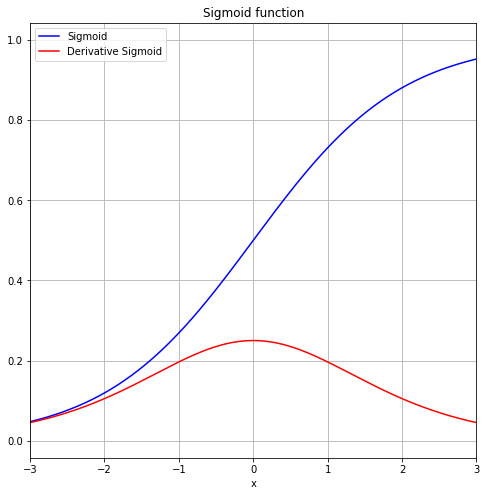

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def derivative_sigmoid(x): 
    return sigmoid(x) * (1-sigmoid(x))

X = np.linspace(-5,5,1001)
sig_Y = sigmoid(X)
derivative_sig_Y = derivative_sigmoid(X)

plt.figure(figsize=(8,8))
plt.plot(X, sig_Y, color='b', label='Sigmoid')
plt.plot(X, derivative_sig_Y, color='r', label='Derivative Sigmoid')
plt.legend(loc='best')
plt.title("Sigmoid function")
plt.xlabel("x")
plt.xlim(-3,3)
plt.grid()
plt.show()

## 7. 다음의 빈칸에 들어갈 말은?

- 1) 밥그릇 모양의 그래프에서 경사도를 따라 움직이면서 기울기가 0이 되는 지점을 찾는 것을 경사하강법(gradient descent algorithm)이라고 한다.
- 2) 1)에서 이동거리를 정해주는 것은 활성화 함수(activation function)이다.
- 3) 인공지능에서 신경망을 이루는 가장 중요한 기본 단위는 노드(node)이다.
- 4) 활성화 함수로서 x가 음수일 경우에는 0, x가 0 이상일 때는 x 값을 가지는 함수는 relu 함수이다.
- 5) 딥러닝에서 입력층과 출력층 사이의 층을 은닉층(hidden layer)이라고 한다.

## 8. 아이리스 데이터 셋을 이용하여 다음을 구하는 프로그램을 작성하시오.

In [57]:
# need library
import numpy as np
import tensorflow as tf
# warning remove
if type(tf.contrib) != type(tf):
    tf.contrib._warning = None
# 딥러닝 구동에 필요한 케라스 함수
from keras.models import Sequential
from keras.layers import Dense    

In [84]:
import pandas as pd
iris = pd.read_csv('data/iris.csv', names = ['sepal_length','sepal_width','petal_length','petal_width','species'])
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [85]:
dataset = iris.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

# one-hot encoding
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = np_utils.to_categorical(Y)

In [86]:
# model
from keras.models import Sequential
from keras.layers.core import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import tensorflow as tf
import os

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

model = Sequential()
model.add(Dense(20, input_dim=4, activation='relu'))
model.add(Dense(10, activation='softplus'))
model.add(Dense(3, activation='softmax')) # softmax

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

iris_history = model.fit(X, Y_encoded, epochs=50, batch_size=1)

print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

Epoch 1/50
150/150 [==============================] - 1s 3ms/step - loss: 1.1209 - acc: 0.3733
Epoch 2/50
150/150 [==============================] - 0s 687us/step - loss: 0.6422 - acc: 0.8600
Epoch 3/50
150/150 [==============================] - 0s 700us/step - loss: 0.4282 - acc: 0.8933
Epoch 4/50
150/150 [==============================] - 0s 693us/step - loss: 0.3326 - acc: 0.9267
Epoch 5/50
150/150 [==============================] - 0s 680us/step - loss: 0.2802 - acc: 0.9133
Epoch 6/50
150/150 [==============================] - 0s 720us/step - loss: 0.2405 - acc: 0.9533
Epoch 7/50
150/150 [==============================] - 0s 733us/step - loss: 0.2217 - acc: 0.9467
Epoch 8/50
150/150 [==============================] - 0s 727us/step - loss: 0.1920 - acc: 0.9733
Epoch 9/50
150/150 [==============================] - 0s 693us/step - loss: 0.1671 - acc: 0.9600
Epoch 10/50
150/150 [==============================] - 0s 667us/step - loss: 0.1550 - acc: 0.9667
Epoch 11/50
150/150 [==========

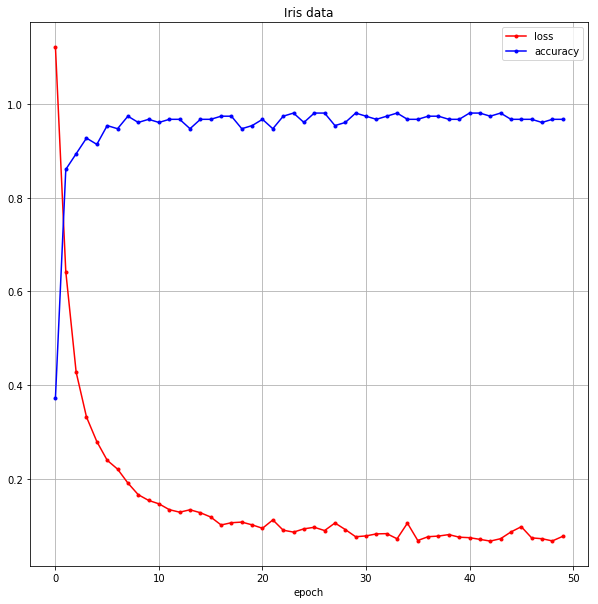

In [87]:
y_loss = iris_history.history['loss'] # 오차
y_acc = iris_history.history['acc'] # 정확도
x_len = np.arange(len(y_loss))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))

plt.plot(x_len, y_loss, marker='.', c='red', label='loss')
plt.plot(x_len, y_acc, marker='.', c='blue', label='accuracy')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.title('Iris data')

plt.show()

## 9. 피마 인디언 데이터 셋을 이용하여 다음을 구하는 프로그램을 작성하시오.

In [88]:
import pandas as pd
pima = pd.read_csv('data/pima-indians-diabetes.csv',
                names = ['pregnant','plasma','preesure','thickness',
                        'insulin','BMI','pedigree','age','class'])
pima.head(20)

,pregnant,plasma,preesure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [114]:
# model
from keras.models import Sequential
from keras.layers.core import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import tensorflow as tf
import os

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

dataset = pima.values
X = dataset[:,0:8]
Y = dataset[:,8]

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='softplus'))
model.add(Dense(8, activation='softplus'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = 'pima_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "pima_model/{epoch:02d}-{val_loss:.4f}.hdf5"
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=150)

pima_history = model.fit(X, Y, validation_split=0.25, epochs=3000, batch_size=100, callbacks=[early_stopping_callback, checkpointer])

print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Train on 576 samples, validate on 192 samples
Epoch 1/3000
576/576 [==============================] - 1s 3ms/step - loss: 1.1712 - acc: 0.6597 - val_loss: 1.1799 - val_acc: 0.6042

Epoch 00001: val_loss improved from inf to 1.17992, saving model to pima_model/01-1.1799.hdf5
Epoch 2/3000
576/576 [==============================] - 0s 14us/step - loss: 0.9365 - acc: 0.6597 - val_loss: 0.9800 - val_acc: 0.5365

Epoch 00002: val_loss improved from 1.17992 to 0.98005, saving model to pima_model/02-0.9800.hdf5
Epoch 3/3000
576/576 [==============================] - 0s 16us/step - loss: 0.8215 - acc: 0.6476 - val_loss: 0.8993 - val_acc: 0.5521

Epoch 00003: val_loss improved from 0.98005 to 0.89925, saving model to pima_model/03-0.8993.hdf5
Epoch 4/3000
576/576 [==============================] - 0s 17us/step - loss: 0.7719 - acc: 0.6528 - val_loss: 0.8459 - val_acc: 0.5469

Epoch 00004: val_loss improved from 0.89925 to 0.84593, saving model to pima_model/04-0.8459.hdf5
Epoch 5/3000
576/576 [=


Epoch 00038: val_loss did not improve from 0.67985
Epoch 39/3000
576/576 [==============================] - 0s 17us/step - loss: 0.5610 - acc: 0.7014 - val_loss: 0.6822 - val_acc: 0.5990

Epoch 00039: val_loss did not improve from 0.67985
Epoch 40/3000
576/576 [==============================] - 0s 19us/step - loss: 0.5600 - acc: 0.7118 - val_loss: 0.6764 - val_acc: 0.5677

Epoch 00040: val_loss improved from 0.67985 to 0.67641, saving model to pima_model/40-0.6764.hdf5
Epoch 41/3000
576/576 [==============================] - 0s 21us/step - loss: 0.5580 - acc: 0.7083 - val_loss: 0.6782 - val_acc: 0.5833

Epoch 00041: val_loss did not improve from 0.67641
Epoch 42/3000
576/576 [==============================] - 0s 16us/step - loss: 0.5583 - acc: 0.7066 - val_loss: 0.6701 - val_acc: 0.5833

Epoch 00042: val_loss improved from 0.67641 to 0.67012, saving model to pima_model/42-0.6701.hdf5
Epoch 43/3000
576/576 [==============================] - 0s 17us/step - loss: 0.5595 - acc: 0.6979 - v


Epoch 00079: val_loss did not improve from 0.64909
Epoch 80/3000
576/576 [==============================] - 0s 17us/step - loss: 0.5330 - acc: 0.7292 - val_loss: 0.6498 - val_acc: 0.6406

Epoch 00080: val_loss did not improve from 0.64909
Epoch 81/3000
576/576 [==============================] - 0s 16us/step - loss: 0.5336 - acc: 0.7413 - val_loss: 0.6457 - val_acc: 0.6667

Epoch 00081: val_loss improved from 0.64909 to 0.64570, saving model to pima_model/81-0.6457.hdf5
Epoch 82/3000
576/576 [==============================] - 0s 19us/step - loss: 0.5321 - acc: 0.7413 - val_loss: 0.6545 - val_acc: 0.6354

Epoch 00082: val_loss did not improve from 0.64570
Epoch 83/3000
576/576 [==============================] - 0s 16us/step - loss: 0.5307 - acc: 0.7344 - val_loss: 0.6509 - val_acc: 0.6302

Epoch 00083: val_loss did not improve from 0.64570
Epoch 84/3000
576/576 [==============================] - 0s 17us/step - loss: 0.5315 - acc: 0.7222 - val_loss: 0.6523 - val_acc: 0.6198

Epoch 00084:

576/576 [==============================] - 0s 16us/step - loss: 0.5095 - acc: 0.7604 - val_loss: 0.6404 - val_acc: 0.6771

Epoch 00122: val_loss did not improve from 0.63885
Epoch 123/3000
576/576 [==============================] - 0s 17us/step - loss: 0.5111 - acc: 0.7431 - val_loss: 0.6467 - val_acc: 0.6771

Epoch 00123: val_loss did not improve from 0.63885
Epoch 124/3000
576/576 [==============================] - 0s 19us/step - loss: 0.5107 - acc: 0.7587 - val_loss: 0.6384 - val_acc: 0.6719

Epoch 00124: val_loss improved from 0.63885 to 0.63837, saving model to pima_model/124-0.6384.hdf5
Epoch 125/3000
576/576 [==============================] - 0s 16us/step - loss: 0.5074 - acc: 0.7639 - val_loss: 0.6442 - val_acc: 0.6719

Epoch 00125: val_loss did not improve from 0.63837
Epoch 126/3000
576/576 [==============================] - 0s 16us/step - loss: 0.5073 - acc: 0.7587 - val_loss: 0.6497 - val_acc: 0.6875

Epoch 00126: val_loss did not improve from 0.63837
Epoch 127/3000
576/576

576/576 [==============================] - 0s 14us/step - loss: 0.4856 - acc: 0.7535 - val_loss: 0.6545 - val_acc: 0.6927

Epoch 00165: val_loss did not improve from 0.63497
Epoch 166/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4860 - acc: 0.7708 - val_loss: 0.6491 - val_acc: 0.6823

Epoch 00166: val_loss did not improve from 0.63497
Epoch 167/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4866 - acc: 0.7639 - val_loss: 0.6379 - val_acc: 0.6823

Epoch 00167: val_loss did not improve from 0.63497
Epoch 168/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4862 - acc: 0.7639 - val_loss: 0.6407 - val_acc: 0.6667

Epoch 00168: val_loss did not improve from 0.63497
Epoch 169/3000
576/576 [==============================] - 0s 14us/step - loss: 0.4825 - acc: 0.7552 - val_loss: 0.6512 - val_acc: 0.7031

Epoch 00169: val_loss did not improve from 0.63497
Epoch 170/3000
576/576 [==============================] - 0s 17us/step

576/576 [==============================] - 0s 16us/step - loss: 0.4690 - acc: 0.7708 - val_loss: 0.6223 - val_acc: 0.7188

Epoch 00206: val_loss did not improve from 0.62209
Epoch 207/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4697 - acc: 0.7674 - val_loss: 0.6317 - val_acc: 0.7396

Epoch 00207: val_loss did not improve from 0.62209
Epoch 208/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4696 - acc: 0.7691 - val_loss: 0.6379 - val_acc: 0.7135

Epoch 00208: val_loss did not improve from 0.62209
Epoch 209/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4663 - acc: 0.7726 - val_loss: 0.6208 - val_acc: 0.7188

Epoch 00209: val_loss improved from 0.62209 to 0.62078, saving model to pima_model/209-0.6208.hdf5
Epoch 210/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4702 - acc: 0.7760 - val_loss: 0.6245 - val_acc: 0.7188

Epoch 00210: val_loss did not improve from 0.62078
Epoch 211/3000
576/576


Epoch 00248: val_loss did not improve from 0.60955
Epoch 249/3000
576/576 [==============================] - 0s 19us/step - loss: 0.4598 - acc: 0.7865 - val_loss: 0.6204 - val_acc: 0.7292

Epoch 00249: val_loss did not improve from 0.60955
Epoch 250/3000
576/576 [==============================] - 0s 14us/step - loss: 0.4591 - acc: 0.7760 - val_loss: 0.6231 - val_acc: 0.7344

Epoch 00250: val_loss did not improve from 0.60955
Epoch 251/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4579 - acc: 0.7778 - val_loss: 0.6190 - val_acc: 0.7292

Epoch 00251: val_loss did not improve from 0.60955
Epoch 252/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4612 - acc: 0.7691 - val_loss: 0.6249 - val_acc: 0.7396

Epoch 00252: val_loss did not improve from 0.60955
Epoch 253/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4581 - acc: 0.7795 - val_loss: 0.6122 - val_acc: 0.7240

Epoch 00253: val_loss did not improve from 0.60955
Epo

576/576 [==============================] - 0s 19us/step - loss: 0.4522 - acc: 0.7760 - val_loss: 0.6036 - val_acc: 0.7240

Epoch 00292: val_loss did not improve from 0.60327
Epoch 293/3000
576/576 [==============================] - 0s 14us/step - loss: 0.4545 - acc: 0.7865 - val_loss: 0.6149 - val_acc: 0.7448

Epoch 00293: val_loss did not improve from 0.60327
Epoch 294/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4510 - acc: 0.7778 - val_loss: 0.6162 - val_acc: 0.7292

Epoch 00294: val_loss did not improve from 0.60327
Epoch 295/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4514 - acc: 0.7795 - val_loss: 0.6024 - val_acc: 0.7344

Epoch 00295: val_loss improved from 0.60327 to 0.60243, saving model to pima_model/295-0.6024.hdf5
Epoch 296/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4502 - acc: 0.7899 - val_loss: 0.6237 - val_acc: 0.7187

Epoch 00296: val_loss did not improve from 0.60243
Epoch 297/3000
576/576


Epoch 00334: val_loss did not improve from 0.59004
Epoch 335/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4560 - acc: 0.7743 - val_loss: 0.5955 - val_acc: 0.7396

Epoch 00335: val_loss did not improve from 0.59004
Epoch 336/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4458 - acc: 0.7969 - val_loss: 0.6040 - val_acc: 0.7344

Epoch 00336: val_loss did not improve from 0.59004
Epoch 337/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4429 - acc: 0.7951 - val_loss: 0.6078 - val_acc: 0.7344

Epoch 00337: val_loss did not improve from 0.59004
Epoch 338/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4437 - acc: 0.7917 - val_loss: 0.6009 - val_acc: 0.7604

Epoch 00338: val_loss did not improve from 0.59004
Epoch 339/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4499 - acc: 0.7743 - val_loss: 0.6135 - val_acc: 0.7448

Epoch 00339: val_loss did not improve from 0.59004
Epo


Epoch 00377: val_loss did not improve from 0.58974
Epoch 378/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4420 - acc: 0.7934 - val_loss: 0.6049 - val_acc: 0.7448

Epoch 00378: val_loss did not improve from 0.58974
Epoch 379/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4387 - acc: 0.7899 - val_loss: 0.5920 - val_acc: 0.7500

Epoch 00379: val_loss did not improve from 0.58974
Epoch 380/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4401 - acc: 0.7951 - val_loss: 0.6199 - val_acc: 0.7500

Epoch 00380: val_loss did not improve from 0.58974
Epoch 381/3000
576/576 [==============================] - 0s 19us/step - loss: 0.4392 - acc: 0.7882 - val_loss: 0.6048 - val_acc: 0.7448

Epoch 00381: val_loss did not improve from 0.58974
Epoch 382/3000
576/576 [==============================] - 0s 14us/step - loss: 0.4387 - acc: 0.7969 - val_loss: 0.6025 - val_acc: 0.7500

Epoch 00382: val_loss did not improve from 0.58974
Epo

576/576 [==============================] - 0s 16us/step - loss: 0.4327 - acc: 0.7969 - val_loss: 0.5978 - val_acc: 0.7448

Epoch 00420: val_loss did not improve from 0.58161
Epoch 421/3000
576/576 [==============================] - 0s 19us/step - loss: 0.4322 - acc: 0.7934 - val_loss: 0.6019 - val_acc: 0.7396

Epoch 00421: val_loss did not improve from 0.58161
Epoch 422/3000
576/576 [==============================] - 0s 12us/step - loss: 0.4336 - acc: 0.8003 - val_loss: 0.5972 - val_acc: 0.7552

Epoch 00422: val_loss did not improve from 0.58161
Epoch 423/3000
576/576 [==============================] - 0s 19us/step - loss: 0.4369 - acc: 0.7951 - val_loss: 0.5938 - val_acc: 0.7344

Epoch 00423: val_loss did not improve from 0.58161
Epoch 424/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4326 - acc: 0.7969 - val_loss: 0.5879 - val_acc: 0.7500

Epoch 00424: val_loss did not improve from 0.58161
Epoch 425/3000
576/576 [==============================] - 0s 17us/step

576/576 [==============================] - 0s 16us/step - loss: 0.4294 - acc: 0.7969 - val_loss: 0.5983 - val_acc: 0.7500

Epoch 00463: val_loss did not improve from 0.58027
Epoch 464/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4289 - acc: 0.8003 - val_loss: 0.5985 - val_acc: 0.7500

Epoch 00464: val_loss did not improve from 0.58027
Epoch 465/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4282 - acc: 0.7951 - val_loss: 0.6008 - val_acc: 0.7500

Epoch 00465: val_loss did not improve from 0.58027
Epoch 466/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4284 - acc: 0.7951 - val_loss: 0.5901 - val_acc: 0.7552

Epoch 00466: val_loss did not improve from 0.58027
Epoch 467/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4280 - acc: 0.7934 - val_loss: 0.6001 - val_acc: 0.7500

Epoch 00467: val_loss did not improve from 0.58027
Epoch 468/3000
576/576 [==============================] - 0s 17us/step

576/576 [==============================] - 0s 16us/step - loss: 0.4231 - acc: 0.7969 - val_loss: 0.5961 - val_acc: 0.7604

Epoch 00506: val_loss did not improve from 0.58027
Epoch 507/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4244 - acc: 0.8021 - val_loss: 0.6082 - val_acc: 0.7448

Epoch 00507: val_loss did not improve from 0.58027
Epoch 508/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4247 - acc: 0.7969 - val_loss: 0.5903 - val_acc: 0.7552

Epoch 00508: val_loss did not improve from 0.58027
Epoch 509/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4221 - acc: 0.7986 - val_loss: 0.6046 - val_acc: 0.7448

Epoch 00509: val_loss did not improve from 0.58027
Epoch 510/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4244 - acc: 0.8038 - val_loss: 0.6003 - val_acc: 0.7448

Epoch 00510: val_loss did not improve from 0.58027
Epoch 511/3000
576/576 [==============================] - 0s 16us/step

576/576 [==============================] - 0s 19us/step - loss: 0.4223 - acc: 0.7969 - val_loss: 0.5869 - val_acc: 0.7656

Epoch 00549: val_loss did not improve from 0.57563
Epoch 550/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4196 - acc: 0.7986 - val_loss: 0.6040 - val_acc: 0.7500

Epoch 00550: val_loss did not improve from 0.57563
Epoch 551/3000
576/576 [==============================] - 0s 19us/step - loss: 0.4200 - acc: 0.7917 - val_loss: 0.6083 - val_acc: 0.7500

Epoch 00551: val_loss did not improve from 0.57563
Epoch 552/3000
576/576 [==============================] - 0s 17us/step - loss: 0.4208 - acc: 0.7969 - val_loss: 0.5923 - val_acc: 0.7448

Epoch 00552: val_loss did not improve from 0.57563
Epoch 553/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4211 - acc: 0.7951 - val_loss: 0.6018 - val_acc: 0.7552

Epoch 00553: val_loss did not improve from 0.57563
Epoch 554/3000
576/576 [==============================] - 0s 17us/step

576/576 [==============================] - 0s 17us/step - loss: 0.4177 - acc: 0.7951 - val_loss: 0.5983 - val_acc: 0.7500

Epoch 00592: val_loss did not improve from 0.57563
Epoch 593/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4174 - acc: 0.8003 - val_loss: 0.5868 - val_acc: 0.7500

Epoch 00593: val_loss did not improve from 0.57563
Epoch 594/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4193 - acc: 0.7934 - val_loss: 0.6145 - val_acc: 0.7448

Epoch 00594: val_loss did not improve from 0.57563
Epoch 595/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4208 - acc: 0.7986 - val_loss: 0.5980 - val_acc: 0.7552

Epoch 00595: val_loss did not improve from 0.57563
Epoch 596/3000
576/576 [==============================] - 0s 19us/step - loss: 0.4183 - acc: 0.7969 - val_loss: 0.6050 - val_acc: 0.7500

Epoch 00596: val_loss did not improve from 0.57563
Epoch 597/3000
576/576 [==============================] - 0s 14us/step

576/576 [==============================] - 0s 17us/step - loss: 0.4157 - acc: 0.8003 - val_loss: 0.6044 - val_acc: 0.7396

Epoch 00635: val_loss did not improve from 0.57563
Epoch 636/3000
576/576 [==============================] - 0s 19us/step - loss: 0.4147 - acc: 0.7934 - val_loss: 0.6129 - val_acc: 0.7500

Epoch 00636: val_loss did not improve from 0.57563
Epoch 637/3000
576/576 [==============================] - 0s 14us/step - loss: 0.4146 - acc: 0.7951 - val_loss: 0.6102 - val_acc: 0.7500

Epoch 00637: val_loss did not improve from 0.57563
Epoch 638/3000
576/576 [==============================] - 0s 19us/step - loss: 0.4154 - acc: 0.7969 - val_loss: 0.6048 - val_acc: 0.7344

Epoch 00638: val_loss did not improve from 0.57563
Epoch 639/3000
576/576 [==============================] - 0s 16us/step - loss: 0.4177 - acc: 0.7934 - val_loss: 0.6006 - val_acc: 0.7656

Epoch 00639: val_loss did not improve from 0.57563
Epoch 640/3000
576/576 [==============================] - 0s 16us/step

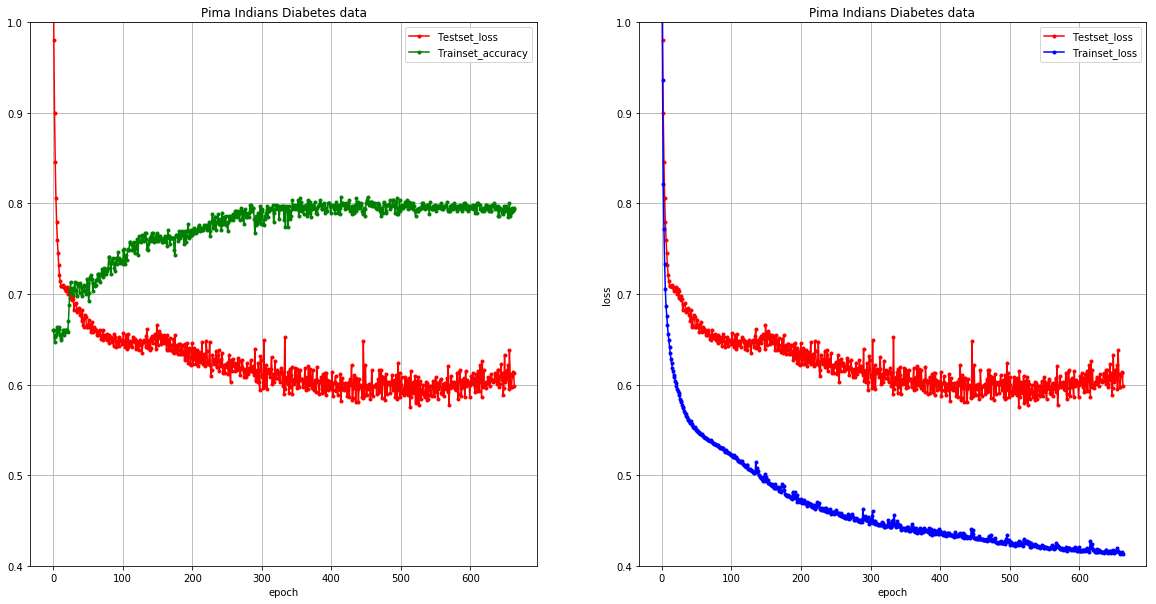

In [116]:
y_vloss = pima_history.history['val_loss'] # 검증셋으로 측정한 오차
y_loss = pima_history.history['loss'] # 학습셋의 오차
y_acc = pima_history.history['acc'] # 학습셋의 정확도
x_len = np.arange(len(y_loss))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))

plt.subplot(121)
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_acc, marker='.', c='green', label='Trainset_accuracy')
plt.legend(loc='best')
plt.grid()
plt.ylim(0.4,1)
plt.xlabel('epoch')
plt.title('Pima Indians Diabetes data')

plt.subplot(122)
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='best')
plt.grid()
plt.ylim(0.4,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Pima Indians Diabetes data')

plt.show()